In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 데이터 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# --- 데이터 전처리 ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce') # PM10 변수로 조정

# 1. 월별 평균 PM10 농도 집계
df_monthly = df.set_index('Date').groupby('City')['PM10'].resample('M').mean().reset_index()
df_monthly = df_monthly.rename(columns={'PM10': 'Monthly_Avg_PM10'})
df_monthly.dropna(subset=['Monthly_Avg_PM10'], inplace=True)

# 2. 최대 월평균 농도를 기준으로 Top 5 도시 선정
top_max_cities = df_monthly.groupby('City')['Monthly_Avg_PM10'].max().nlargest(5).index.tolist()

# 3. Top 5 도시 데이터만 필터링
df_top_cities = df_monthly[df_monthly['City'].isin(top_max_cities)]

# --- 시각화 (월별 추이 그래프) ---
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=df_top_cities,
    x='Date', # x축: 월별 날짜
    y='Monthly_Avg_PM10', # y축: 월별 평균 PM10 농도
    hue='City', # 선 색상: 도시별로 구분
    marker='o',
    dashes=False
)

# x축 날짜 포맷팅 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# 제목 및 라벨을 영어로 설정 (발표 일관성 유지)
plt.title('Top 5 Cities: Monthly Average PM10 Trend', fontsize=16)
plt.xlabel('Month (Year-Month)', fontsize=12)
plt.ylabel('Monthly Average PM10 Concentration', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='City', loc='upper left')
plt.tight_layout()

# 이미지 파일 저장
image_filename = "top5_monthly_pm10_trend_en.png"
plt.savefig(image_filename)
plt.close()

/tmp/ipython-input-3604241228.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Date').groupby('City')['PM10'].resample('M').mean().reset_index()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
# CSV 파일 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# 분석에 사용할 컬럼 정의 (PM10 포함 모든 오염 물질과 날씨)
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
weather_cols = ['Temperature', 'Humidity', 'Wind Speed']
all_cols = pollutant_cols + weather_cols

# 'Date' 컬럼을 datetime 형식으로 변환하고 인덱스로 설정
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')

# 관련 컬럼들을 숫자형으로 변환
for col in all_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'Seoul' 데이터만 필터링
seoul_df = df[df['City'] == 'Seoul']

# --- 월별 집계 및 상관관계 계산 ---
# 일별 데이터를 월별(M) 평균으로 리샘플링(집계)하고 결측치 제거
seoul_monthly_df = seoul_df[all_cols].resample('M').mean().dropna()

# 월별 데이터셋의 상관 행렬 계산
monthly_correlation_matrix_seoul = seoul_monthly_df.corr().round(2)

# --- 히트맵 시각화 ---
plt.figure(figsize=(10, 8))

sns.heatmap(
    monthly_correlation_matrix_seoul,
    annot=True,              # 상관계수 숫자 표시
    fmt=".2f",               # 소수점 둘째 자리까지 표시
    cmap='coolwarm',         # 색상 팔레트 설정 (음수/양수 대비)
    cbar=True,
    square=True,
    linewidths=.5,
    cbar_kws={"label": "Correlation Coefficient"} # 컬러바 라벨
)

# 제목을 영어로 설정 (분석 일관성 유지)
plt.title('Seoul Monthly Average: Air Quality and Weather Factors Correlation Heatmap', fontsize=12)
plt.tight_layout()

# 이미지 파일로 저장
image_filename = "seoul_monthly_correlation_heatmap_user.png"
plt.savefig(image_filename)
plt.close()

/tmp/ipython-input-2469875302.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  seoul_monthly_df = seoul_df[all_cols].resample('M').mean().dropna()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
# CSV 파일 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# 분석에 사용할 컬럼 정의 (PM10 포함 모든 오염 물질과 날씨)
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
weather_cols = ['Temperature', 'Humidity', 'Wind Speed']
all_cols = pollutant_cols + weather_cols

# 'Date' 컬럼을 datetime 형식으로 변환하고 인덱스로 설정
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')

# 관련 컬럼들을 숫자형으로 변환
for col in all_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'Seoul' 데이터만 필터링
seoul_df = df[df['City'] == 'Seoul']

# --- 월별 집계 및 상관관계 계산 ---
# 일별 데이터를 월별(M) 평균으로 리샘플링(집계)하고 결측치 제거
seoul_monthly_df = seoul_df[all_cols].resample('M').mean().dropna()

# 월별 데이터셋의 상관 행렬 계산
monthly_correlation_matrix_seoul = seoul_monthly_df.corr().round(2)

# --- 히트맵 시각화 ---
plt.figure(figsize=(10, 8))

sns.heatmap(
    monthly_correlation_matrix_seoul,
    annot=True,              # 상관계수 숫자 표시
    fmt=".2f",               # 소수점 둘째 자리까지 표시
    cmap='coolwarm',         # 색상 팔레트 설정 (음수/양수 대비)
    vmin=-1,                 # <--- 최소값을 -1로 강제 설정 (수정됨)
    vmax=1,                  # <--- 최대값을 1로 강제 설정 (수정됨)
    cbar=True,
    square=True,
    linewidths=.5,
    cbar_kws={"label": "Correlation Coefficient"} # 컬러바 라벨
)

# 제목을 영어로 설정 (분석 일관성 유지)
plt.title('Seoul Monthly Average: Air Quality and Weather Factors Correlation Heatmap (Range -1 to 1)', fontsize=12)
plt.tight_layout()

# 이미지 파일로 저장
image_filename = "seoul_monthly_correlation_heatmap_vmin_vmax.png"
plt.savefig(image_filename)
plt.close()

# 코랩에서 실행할 경우, 저장된 파일명을 출력해서 확인할 수 있습니다.
# print(f"Heatmap saved as: {image_filename}")

/tmp/ipython-input-1738734551.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  seoul_monthly_df = seoul_df[all_cols].resample('M').mean().dropna()


In [ ]:
import pandas as pd
import statsmodels.api as sm # 회귀 분석 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# --- 데이터 준비 및 전처리 ---
# CSV 파일 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# 분석에 사용할 컬럼 정의
all_cols = ['PM10', 'Temperature']

# 'Date' 컬럼을 datetime 형식으로 변환하고 인덱스로 설정
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')

# 관련 컬럼들을 숫자형으로 변환
for col in all_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'Seoul' 데이터만 필터링
seoul_df = df[df['City'] == 'Seoul']

# 일별 데이터를 월별 평균으로 리샘플링(집계)하고 결측치 제거
reg_df_monthly_seoul = seoul_df[all_cols].resample('M').mean().dropna()

# --- 1. 단순 선형 회귀 분석 (PM10 vs. Temperature) ---
print("--- 서울 월별 평균: PM10 vs. Temperature 회귀 분석 결과 ---")

# 종속 변수 (Y): PM10
Y = reg_df_monthly_seoul['PM10']

# 독립 변수 (X): Temperature
X = reg_df_monthly_seoul['Temperature']
# 절편(상수항) 추가 (회귀 모델에 필수)
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(Y, X)
results = model.fit()

# 회귀 분석 요약 결과 출력
print(results.summary().as_text())

# --- 2. 시각화 (PM10 vs. Temperature) ---
plt.figure(figsize=(8, 6))

# 산점도와 회귀선을 동시에 표시
sns.regplot(
    x='Temperature',
    y='PM10',
    data=reg_df_monthly_seoul, # 월별 데이터 사용
    scatter_kws={'alpha':0.8},
    line_kws={'color':'red'}
)

# 제목 및 라벨을 영어로 설정
plt.title('Seoul Monthly Avg: PM10 vs. Temperature Regression', fontsize=14)
plt.xlabel('Monthly Average Temperature', fontsize=12)
plt.ylabel('Monthly Average PM10 Concentration', fontsize=12)

# 이미지 파일로 저장
image_filename = "seoul_pm10_temp_regression.png"
plt.savefig(image_filename)
plt.close()

print(f"\n시각화 파일 저장 완료: {image_filename}")

/tmp/ipython-input-445862266.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reg_df_monthly_seoul = seoul_df[all_cols].resample('M').mean().dropna()


--- 서울 월별 평균: PM10 vs. Temperature 회귀 분석 결과 ---
                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     11.49
Date:                Fri, 12 Dec 2025   Prob (F-statistic):            0.00689
Time:                        14:17:45   Log-Likelihood:                -38.285
No. Observations:                  12   AIC:                             80.57
Df Residuals:                      10   BIC:                             81.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
co

In [ ]:
import pandas as pd
import statsmodels.api as sm # 회귀 분석 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# --- 데이터 준비 및 전처리 ---
# CSV 파일 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# 분석에 사용할 컬럼 정의
all_cols = ['CO', 'Temperature']

# 'Date' 컬럼을 datetime 형식으로 변환하고 인덱스로 설정
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')

# 관련 컬럼들을 숫자형으로 변환
for col in all_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'Seoul' 데이터만 필터링
seoul_df = df[df['City'] == 'Seoul']

# 일별 데이터를 월별 평균으로 리샘플링(집계)하고 결측치 제거
reg_df_monthly_seoul = seoul_df[all_cols].resample('M').mean().dropna()

# --- 1. 단순 선형 회귀 분석 (CO vs. Temperature) ---
print("--- 서울 월별 평균: CO vs. Temperature 회귀 분석 결과 ---")

# 종속 변수 (Y): CO (난방 배출물 대리 변수)
Y = reg_df_monthly_seoul['CO']

# 독립 변수 (X): Temperature (저온 요인)
X = reg_df_monthly_seoul['Temperature']
# 절편(상수항) 추가 (회귀 모델에 필수)
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(Y, X)
results = model.fit()

# 회귀 분석 요약 결과 출력
print(results.summary().as_text())

# --- 2. 시각화 (CO vs. Temperature) ---
plt.figure(figsize=(8, 6))

# 산점도와 회귀선을 동시에 표시
sns.regplot(
    x='Temperature',
    y='CO',
    data=reg_df_monthly_seoul, # 월별 데이터 사용
    scatter_kws={'alpha':0.8},
    line_kws={'color':'red'}
)

# 제목 및 라벨을 영어로 설정
plt.title('Seoul Monthly Avg: CO vs. Temperature Regression', fontsize=14)
plt.xlabel('Monthly Average Temperature', fontsize=12)
plt.ylabel('Monthly Average CO Concentration', fontsize=12)

# 이미지 파일로 저장
image_filename = "seoul_co_temp_regression.png"
plt.savefig(image_filename)
plt.close()

print(f"\n시각화 파일 저장 완료: {image_filename}")

/tmp/ipython-input-3688946606.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reg_df_monthly_seoul = seoul_df[all_cols].resample('M').mean().dropna()


--- 서울 월별 평균: CO vs. Temperature 회귀 분석 결과 ---
                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     15.71
Date:                Fri, 12 Dec 2025   Prob (F-statistic):            0.00267
Time:                        14:19:19   Log-Likelihood:                 2.2898
No. Observations:                  12   AIC:                           -0.5795
Df Residuals:                      10   BIC:                            0.3903
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cons

In [ ]:
import pandas as pd
import statsmodels.api as sm # 회귀 분석 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# --- 데이터 준비 및 전처리 ---
# CSV 파일 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# 분석에 사용할 컬럼 정의
all_cols = ['PM10', 'CO']

# 'Date' 컬럼을 datetime 형식으로 변환하고 인덱스로 설정
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')

# 관련 컬럼들을 숫자형으로 변환
for col in all_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'Seoul' 데이터만 필터링
seoul_df = df[df['City'] == 'Seoul']

# 일별 데이터를 월별 평균으로 리샘플링(집계)하고 결측치 제거
reg_df_monthly_seoul = seoul_df[all_cols].resample('M').mean().dropna()

# --- 1. 단순 선형 회귀 분석 (PM10 vs. CO) ---
print("--- 서울 월별 평균: PM10 vs. CO 회귀 분석 결과 ---")

# 종속 변수 (Y): PM10
Y = reg_df_monthly_seoul['PM10']

# 독립 변수 (X): CO
X = reg_df_monthly_seoul['CO']
# 절편(상수항) 추가 (회귀 모델에 필수)
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(Y, X)
results = model.fit()

# 회귀 분석 요약 결과 출력
print(results.summary().as_text())

# --- 2. 시각화 (PM10 vs. CO) ---
plt.figure(figsize=(8, 6))

# 산점도와 회귀선을 동시에 표시
sns.regplot(
    x='CO',
    y='PM10',
    data=reg_df_monthly_seoul, # 월별 데이터 사용
    scatter_kws={'alpha':0.8},
    line_kws={'color':'red'}
)

# 제목 및 라벨을 영어로 설정
plt.title('Seoul Monthly Avg: PM10 vs. CO Regression', fontsize=14)
plt.xlabel('Monthly Average CO Concentration', fontsize=12)
plt.ylabel('Monthly Average PM10 Concentration', fontsize=12)

# 이미지 파일로 저장
image_filename = "seoul_pm10_co_regression.png"
plt.savefig(image_filename)
plt.close()

print(f"\n시각화 파일 저장 완료: {image_filename}")

/tmp/ipython-input-1428739878.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reg_df_monthly_seoul = seoul_df[all_cols].resample('M').mean().dropna()


--- 서울 월별 평균: PM10 vs. CO 회귀 분석 결과 ---
                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     7.612
Date:                Fri, 12 Dec 2025   Prob (F-statistic):             0.0202
Time:                        06:26:07   Log-Likelihood:                -39.478
No. Observations:                  12   AIC:                             82.96
Df Residuals:                      10   BIC:                             83.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
# CSV 파일 불러오기
df = pd.read_csv("global_air_quality_data_10000.csv")

# 분석에 사용할 컬럼 정의
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
weather_cols = ['Temperature', 'Humidity', 'Wind Speed']
all_cols = pollutant_cols + weather_cols

# 'Date' 컬럼 변환 및 인덱스 설정
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')

# 숫자형 변환
for col in all_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'Toronto' 데이터만 필터링
toronto_df = df[df['City'] == 'Toronto']

# --- 월별 상관관계 분석 ---
# 월별 평균 리샘플링
toronto_monthly_df = toronto_df[all_cols].resample('M').mean().dropna()

if toronto_monthly_df.shape[0] < 2:
    print("Error: 토론토 데이터가 부족합니다.")
else:
    # 상관 행렬 계산 (소수점 2자리)
    corr_matrix_toronto = toronto_monthly_df.corr().round(2)

    # 행렬 값 출력
    print("\n--- Toronto 월별 상관관계 행렬 ---")
    print(corr_matrix_toronto.to_string())

    # --- 히트맵 시각화 ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix_toronto,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        vmin=-1,  # 범위를 -1부터 1로 고정
        vmax=1,
        cbar=True,
        square=True,
        linewidths=.5,
        cbar_kws={"label": "Correlation Coefficient"}
    )
    plt.title('Toronto Monthly Avg: Correlation Heatmap', fontsize=14)
    plt.tight_layout()

    # 저장
    plt.savefig("toronto_monthly_correlation_heatmap.png")
    plt.close()
    print("토론토 히트맵 저장 완료!")

/tmp/ipython-input-1958208406.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  toronto_monthly_df = toronto_df[all_cols].resample('M').mean().dropna()



--- Toronto 월별 상관관계 행렬 ---
             PM2.5  PM10   NO2   SO2    CO    O3  Temperature  Humidity  Wind Speed
PM2.5         1.00 -0.14  0.16  0.01  0.46 -0.26         0.10      0.32       -0.25
PM10         -0.14  1.00  0.46 -0.57  0.36 -0.51        -0.26      0.02       -0.13
NO2           0.16  0.46  1.00 -0.24  0.31 -0.43         0.06      0.60       -0.51
SO2           0.01 -0.57 -0.24  1.00 -0.02  0.34         0.56     -0.41       -0.03
CO            0.46  0.36  0.31 -0.02  1.00  0.07         0.35     -0.03        0.19
O3           -0.26 -0.51 -0.43  0.34  0.07  1.00         0.38     -0.46        0.53
Temperature   0.10 -0.26  0.06  0.56  0.35  0.38         1.00     -0.05       -0.10
Humidity      0.32  0.02  0.60 -0.41 -0.03 -0.46        -0.05      1.00       -0.39
Wind Speed   -0.25 -0.13 -0.51 -0.03  0.19  0.53        -0.10     -0.39        1.00
토론토 히트맵 저장 완료!


데이터를 성공적으로 불러왔습니다.

=== 회귀분석 결과 요약 ===
R-squared (설명력): 0.0674
Coefficient (기울기): -1.6633
P-value (유의확률): 0.4151


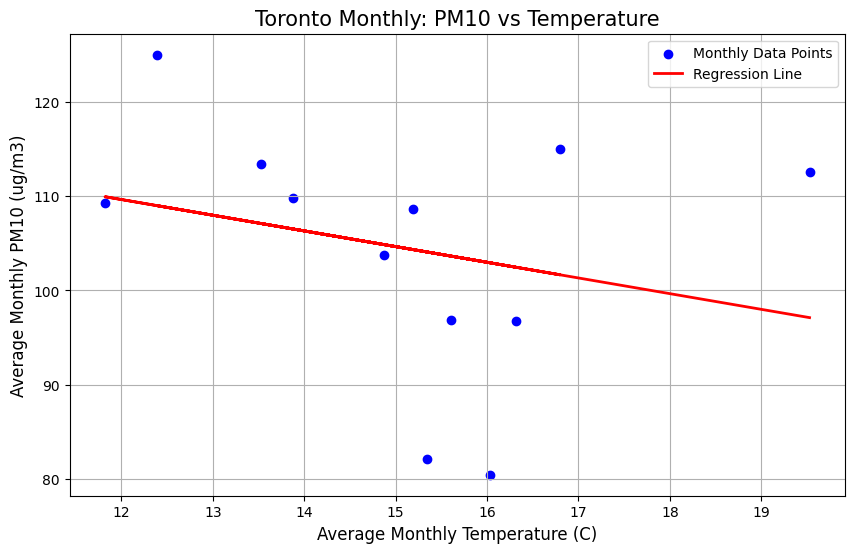

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
# (파일이 코랩의 현재 경로에 업로드되어 있어야 합니다)
filename = 'global_air_quality_data_10000.csv'

try:
    df = pd.read_csv(filename)
    print("데이터를 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: '{filename}' 파일을 찾을 수 없습니다. 코랩의 파일 탭에 CSV를 업로드했는지 확인해주세요.")

# 2. 데이터 전처리
# 토론토 데이터만 필터링
toronto_df = df[df['City'] == 'Toronto'].copy()

# 날짜 형식 변환 및 월별 컬럼 생성
toronto_df['Date'] = pd.to_datetime(toronto_df['Date'])
toronto_df['Month'] = toronto_df['Date'].dt.to_period('M')

# 월별 평균 계산 (PM10, 온도 등)
monthly_df = toronto_df.groupby('Month')[['PM10', 'Temperature']].mean().reset_index()

# 3. PM10 vs 온도 회귀분석 수행
X = monthly_df['Temperature']  # 독립변수: 온도
Y = monthly_df['PM10']         # 종속변수: PM10

# 상수항 추가 (회귀분석 절편 계산을 위해 필요)
X_with_const = sm.add_constant(X)

# 모델 적합 (OLS: 최소자승법)
model = sm.OLS(Y, X_with_const).fit()

# 결과 요약 출력
print("\n=== 회귀분석 결과 요약 ===")
print(f"R-squared (설명력): {model.rsquared:.4f}")
print(f"Coefficient (기울기): {model.params['Temperature']:.4f}")
print(f"P-value (유의확률): {model.pvalues['Temperature']:.4f}")

# 4. 그래프 그리기
# 회귀선 예측값 계산
Y_pred = model.predict(X_with_const)

plt.figure(figsize=(10, 6))

# 실제 데이터 점 찍기
plt.scatter(X, Y, color='blue', label='Monthly Data Points')

# 회귀선 그리기
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

# 그래프 꾸미기 (코랩 한글 폰트 문제 방지를 위해 영어 라벨 사용)
plt.title('Toronto Monthly: PM10 vs Temperature', fontsize=15)
plt.xlabel('Average Monthly Temperature (C)', fontsize=12)
plt.ylabel('Average Monthly PM10 (ug/m3)', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

데이터를 성공적으로 불러왔습니다.

=== 회귀분석 결과 요약 (NO2 vs Humidity) ===
R-squared (설명력): 0.3544
Coefficient (기울기): 0.6931
P-value (유의확률): 0.0411


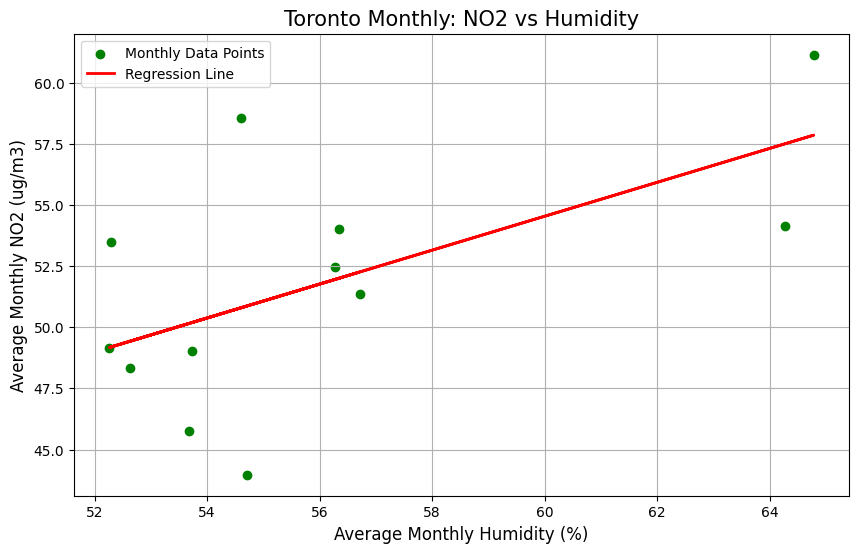

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
# (파일이 코랩의 현재 경로에 업로드되어 있어야 합니다)
filename = 'global_air_quality_data_10000.csv'

try:
    df = pd.read_csv(filename)
    print("데이터를 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: '{filename}' 파일을 찾을 수 없습니다. 코랩의 파일 탭에 CSV를 업로드했는지 확인해주세요.")

# 2. 데이터 전처리
# 토론토 데이터만 필터링
toronto_df = df[df['City'] == 'Toronto'].copy()

# 날짜 형식 변환 및 월별 컬럼 생성
toronto_df['Date'] = pd.to_datetime(toronto_df['Date'])
toronto_df['Month'] = toronto_df['Date'].dt.to_period('M')

# 월별 평균 계산 (NO2, 습도)
monthly_df = toronto_df.groupby('Month')[['NO2', 'Humidity']].mean().reset_index()

# 3. NO2 vs 습도 회귀분석 수행
X = monthly_df['Humidity']  # 독립변수: 습도
Y = monthly_df['NO2']       # 종속변수: NO2

# 상수항 추가 (회귀분석 절편 계산을 위해 필요)
X_with_const = sm.add_constant(X)

# 모델 적합 (OLS: 최소자승법)
model = sm.OLS(Y, X_with_const).fit()

# 결과 요약 출력
print("\n=== 회귀분석 결과 요약 (NO2 vs Humidity) ===")
print(f"R-squared (설명력): {model.rsquared:.4f}")
print(f"Coefficient (기울기): {model.params['Humidity']:.4f}")
print(f"P-value (유의확률): {model.pvalues['Humidity']:.4f}")

# 4. 그래프 그리기
# 회귀선 예측값 계산
Y_pred = model.predict(X_with_const)

plt.figure(figsize=(10, 6))

# 실제 데이터 점 찍기 (녹색으로 표시)
plt.scatter(X, Y, color='green', label='Monthly Data Points')

# 회귀선 그리기
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

# 그래프 꾸미기
plt.title('Toronto Monthly: NO2 vs Humidity', fontsize=15)
plt.xlabel('Average Monthly Humidity (%)', fontsize=12)
plt.ylabel('Average Monthly NO2 (ug/m3)', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()